In [2]:
import numpy as np 
import pandas as pd 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
train = pd.read_csv('Data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)

(42000, 785)


In [5]:
target = train['label']
train = train.drop("label",axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [9]:
trace1 = go.Scatter(x=list(range(784)),y= cum_var_exp,mode='lines+markers',
    name="'Cumulative Explained Variance'",line=dict(shape='spline',color = 'goldenrod'))

trace2 = go.Scatter(x=list(range(784)),y= var_exp,mode='lines+markers',
    name="'Individual Explained Variance'",line=dict(shape='linear',color = 'black'))

fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [10]:
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

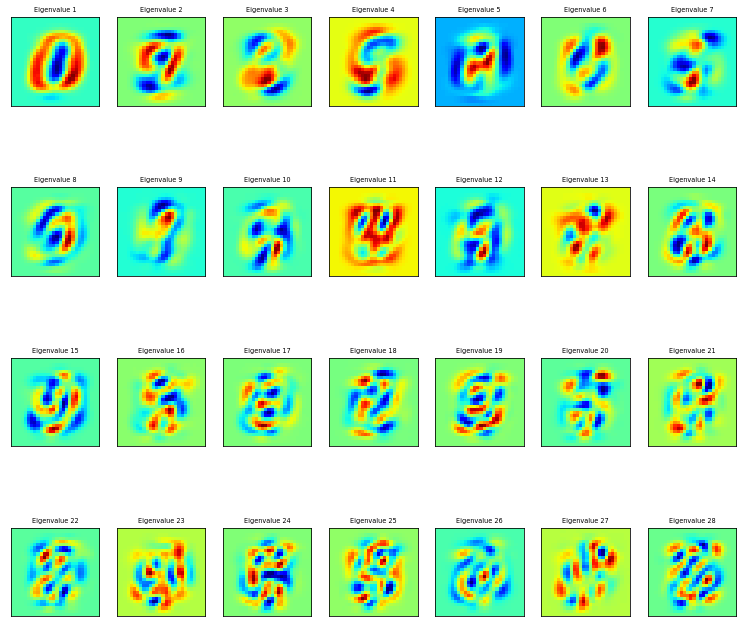

In [11]:
n_row = 4
n_col = 7

plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

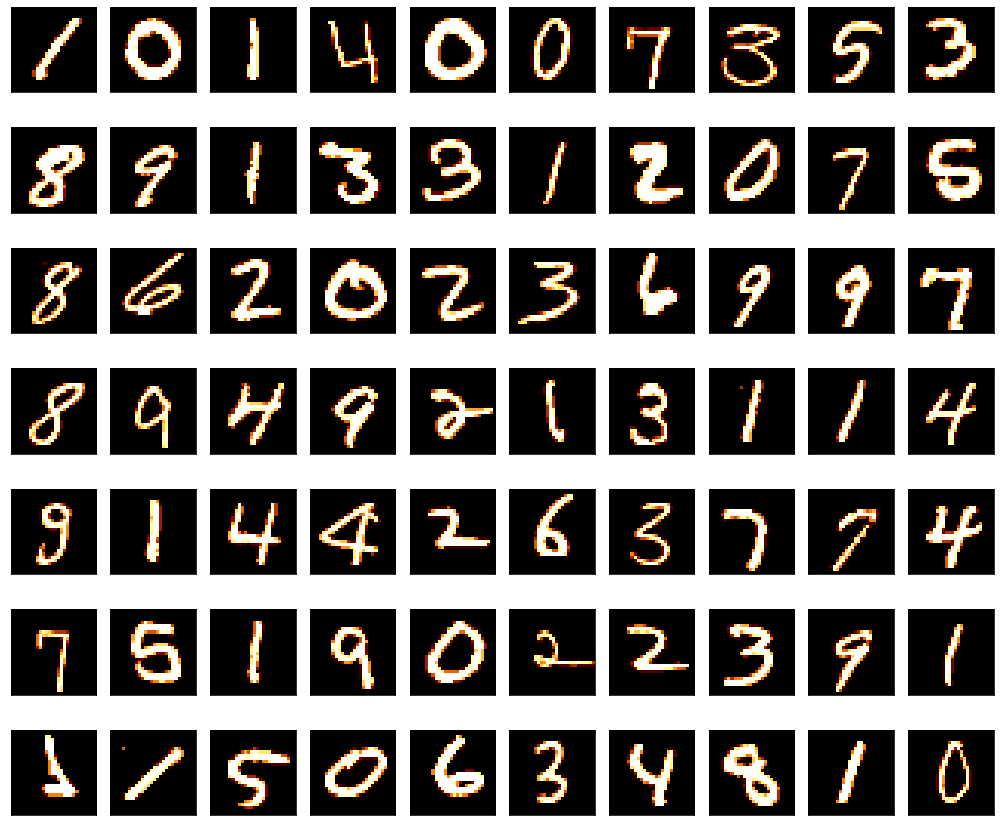

In [12]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [13]:
del X
X= train[:6000].values
del train
X_std = StandardScaler().fit_transform(X)
 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)
 
Target = target[:6000]

In [14]:
trace0 = go.Scatter(x = X_5d[:,0],y = X_5d[:,1],mode = 'markers',text = Target,showlegend = False,
    marker = dict(size = 8,color = Target,colorscale ='Jet',showscale = False,
        line = dict(width = 2,color = 'rgb(255, 255, 255)'),opacity = 0.8))

data = [trace0]

layout = go.Layout(title= 'Principal Component Analysis (PCA)',hovermode= 'closest',
    xaxis= dict(title= 'First Principal Component',ticklen= 5,zeroline= False,gridwidth= 2,),
    yaxis=dict(title= 'Second Principal Component',ticklen= 5,gridwidth= 2,),
    showlegend= True)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
X_clustered = kmeans.fit_predict(X_5d)

trace_Kmeans = go.Scatter(x=X_5d[:, 0], y= X_5d[:, 1], mode="markers",showlegend=False,
        marker=dict(size=8,color = X_clustered,colorscale = 'Portland',showscale=False,
        line = dict(width = 2,color = 'rgb(255, 255, 255)')))

layout = go.Layout(title= 'KMeans Clustering',hovermode= 'closest',
    xaxis= dict(title= 'First Principal Component',ticklen= 5,zeroline= False,gridwidth= 2,),
    yaxis=dict(title= 'Second Principal Component',ticklen= 5,gridwidth= 2,),
    showlegend= True)

data = [trace_Kmeans]
fig1 = dict(data=data, layout= layout)
py.iplot(fig1, filename="svm")

In [16]:
from IPython.display import display, Math, Latex

In [17]:
lda = LDA(n_components=5)

X_LDA_2D = lda.fit_transform(X_std, Target.values )

In [18]:
traceLDA = go.Scatter(x = X_LDA_2D[:,0],y = X_LDA_2D[:,1],mode = 'markers',text = Target,showlegend = True,
    marker = dict(size = 8,color = Target,colorscale ='Jet',showscale = False,
        line = dict(width = 2,color = 'rgb(255, 255, 255)'),opacity = 0.8))

data = [traceLDA]

layout = go.Layout(title= 'Linear Discriminant Analysis (LDA)',hovermode= 'closest',
    xaxis= dict(title= 'First Linear Discriminant',ticklen= 5,zeroline= False,gridwidth= 2,),
    yaxis=dict(title= 'Second Linear Discriminant',ticklen= 5,gridwidth= 2,),
    showlegend= False)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [19]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std) 

In [21]:
traceTSNE = go.Scatter(x = tsne_results[:,0],y = tsne_results[:,1],mode = 'markers',text = Target,
    showlegend = True,marker = dict(size = 8,color = Target,colorscale ='Jet',showscale = False,
        line = dict(width = 2,color = 'rgb(255, 255, 255)'),opacity = 0.8))

data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',hovermode= 'closest',
              yaxis = dict(zeroline = False),xaxis = dict(zeroline = False),showlegend= False)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')